In [15]:
import mysql.connector

# 连接数据库
conn = mysql.connector.connect(
    host="127.0.0.1",
    port=3306,
    user="root",
    password="Bxyssz724",
    database="reading"
)

# 创建一个游标对象
cursor = conn.cursor()

# # 执行查询
cursor.execute("SELECT gaze_t FROM data_page limit 5")
#
# # 获取查询结果
rows = cursor.fetchall()
#
# # 打印结果
timestamp_diff = []
for row in rows:
    gaze_t = [int(float(x)) for x in row[0].split(",")]
    gaze_diff = []
    for i, item in enumerate(gaze_t):
        if i == 0: continue
        gaze_diff.append(gaze_t[i]-gaze_t[i-1])
    timestamp_diff.append(gaze_diff)
    print(timestamp_diff)
#
# 关闭游标和连接
cursor.close()
conn.close()


[[10513, 66, 53, 56, 58, 55, 49, 49, 46, 45, 30, 41, 39, 39, 36, 35, 35, 35, 50, 38, 37, 45, 31, 27, 33, 37, 33, 29, 45, 33, 34, 29, 28, 29, 26, 30, 31, 31, 26, 28, 35, 27, 34, 29, 27, 27, 25, 29, 25, 25, 27, 27, 27, 29, 26, 27, 32, 28, 28, 31, 30, 26, 28, 30, 28, 29, 33, 29, 30, 31, 27, 26, 32, 27, 28, 27, 28, 38, 26, 37, 30, 33, 33, 27, 26, 27, 30, 27, 27, 32, 31, 30, 28, 28, 25, 26, 30, 28, 25, 29, 27, 29, 27, 26, 27, 31, 25, 27, 26, 24, 26, 28, 25, 27, 27, 27, 24, 28, 35, 29, 27, 29, 26, 28, 28, 31, 26, 29, 28, 31, 33, 31, 28, 28, 31, 28, 26, 34, 31, 30, 29, 27, 27, 26, 23, 28, 33, 36, 24, 29, 25, 24, 34, 27, 30, 36, 33, 30, 26, 29, 26, 27, 25, 26, 27, 31, 30, 26, 27, 30, 29, 24, 26, 32, 28, 27, 29, 27, 29, 30, 31, 30, 34, 34, 28, 36, 24, 30, 28, 27, 28, 38, 24, 29, 24, 32, 27, 27, 28, 29, 34, 34, 30, 33, 35, 38, 31, 35, 34, 28, 38, 39, 32, 30, 35, 36, 33, 33, 29, 30, 33, 35, 36, 26, 32, 29, 28, 29, 36, 34, 26, 32, 28, 30, 26, 35, 25, 33, 30, 36, 27, 38, 27, 27, 28, 28, 27, 29, 29,

In [17]:
print(rows[0][0])
# 第一个点有很大的误差，应该被删除

23.700000000186265,10536.300000000745,10602.5,10655.100000000559,10711.700000000186,10769,10824.300000000745,10873.5,10922.300000000745,10968.100000000559,11013,11043.5,11084.200000000186,11123.700000000186,11162.600000000559,11198.800000000745,11233.900000000373,11268.200000000186,11303.300000000745,11353.100000000559,11391,11428.100000000559,11473.100000000559,11504.200000000186,11531.900000000373,11564.900000000373,11601.600000000559,11634.700000000186,11663.600000000559,11708.800000000745,11741.700000000186,11775.600000000559,11804.800000000745,11832.400000000373,11861.400000000373,11887.900000000373,11917.100000000559,11948.800000000745,11979.5,12005.5,12033.5,12068,12095.800000000745,12129.300000000745,12158.600000000559,12185.200000000186,12212.200000000186,12237.300000000745,12266,12291.400000000373,12316.900000000373,12343.100000000559,12370.600000000559,12397.100000000559,12426.400000000373,12452.100000000559,12479.200000000186,12511.100000000559,12539.800000000745,12567.4000

In [21]:
import numpy as np


def filter_abnormal_data(data):
    # 计算均值和标准差
    mean = np.mean(data)
    std_dev = np.std(data)
    # 定义异常点的阈值（例如，超过均值的两倍标准差）
    threshold = mean + 2 * std_dev
    # 过滤掉异常点
    filtered_data = [x for x in data if x <= threshold]
    return filtered_data

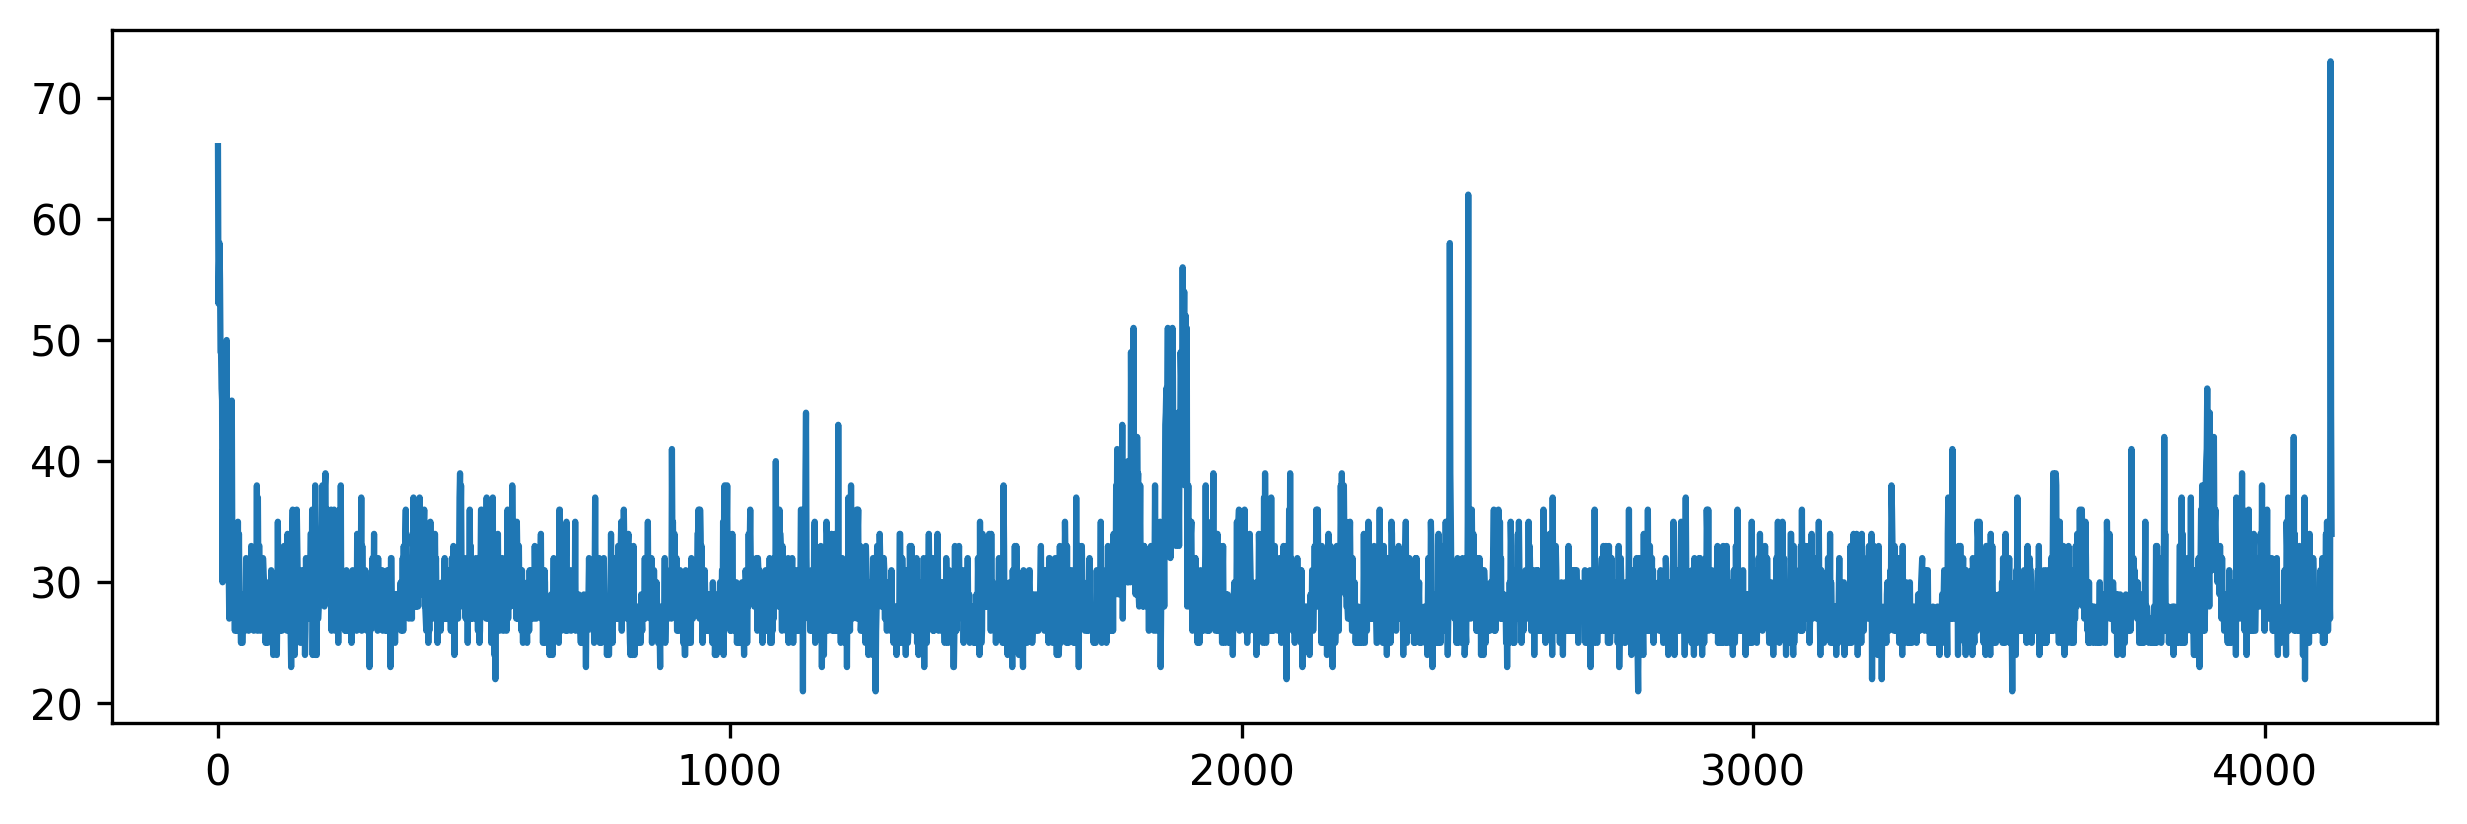

3.8211454983867466


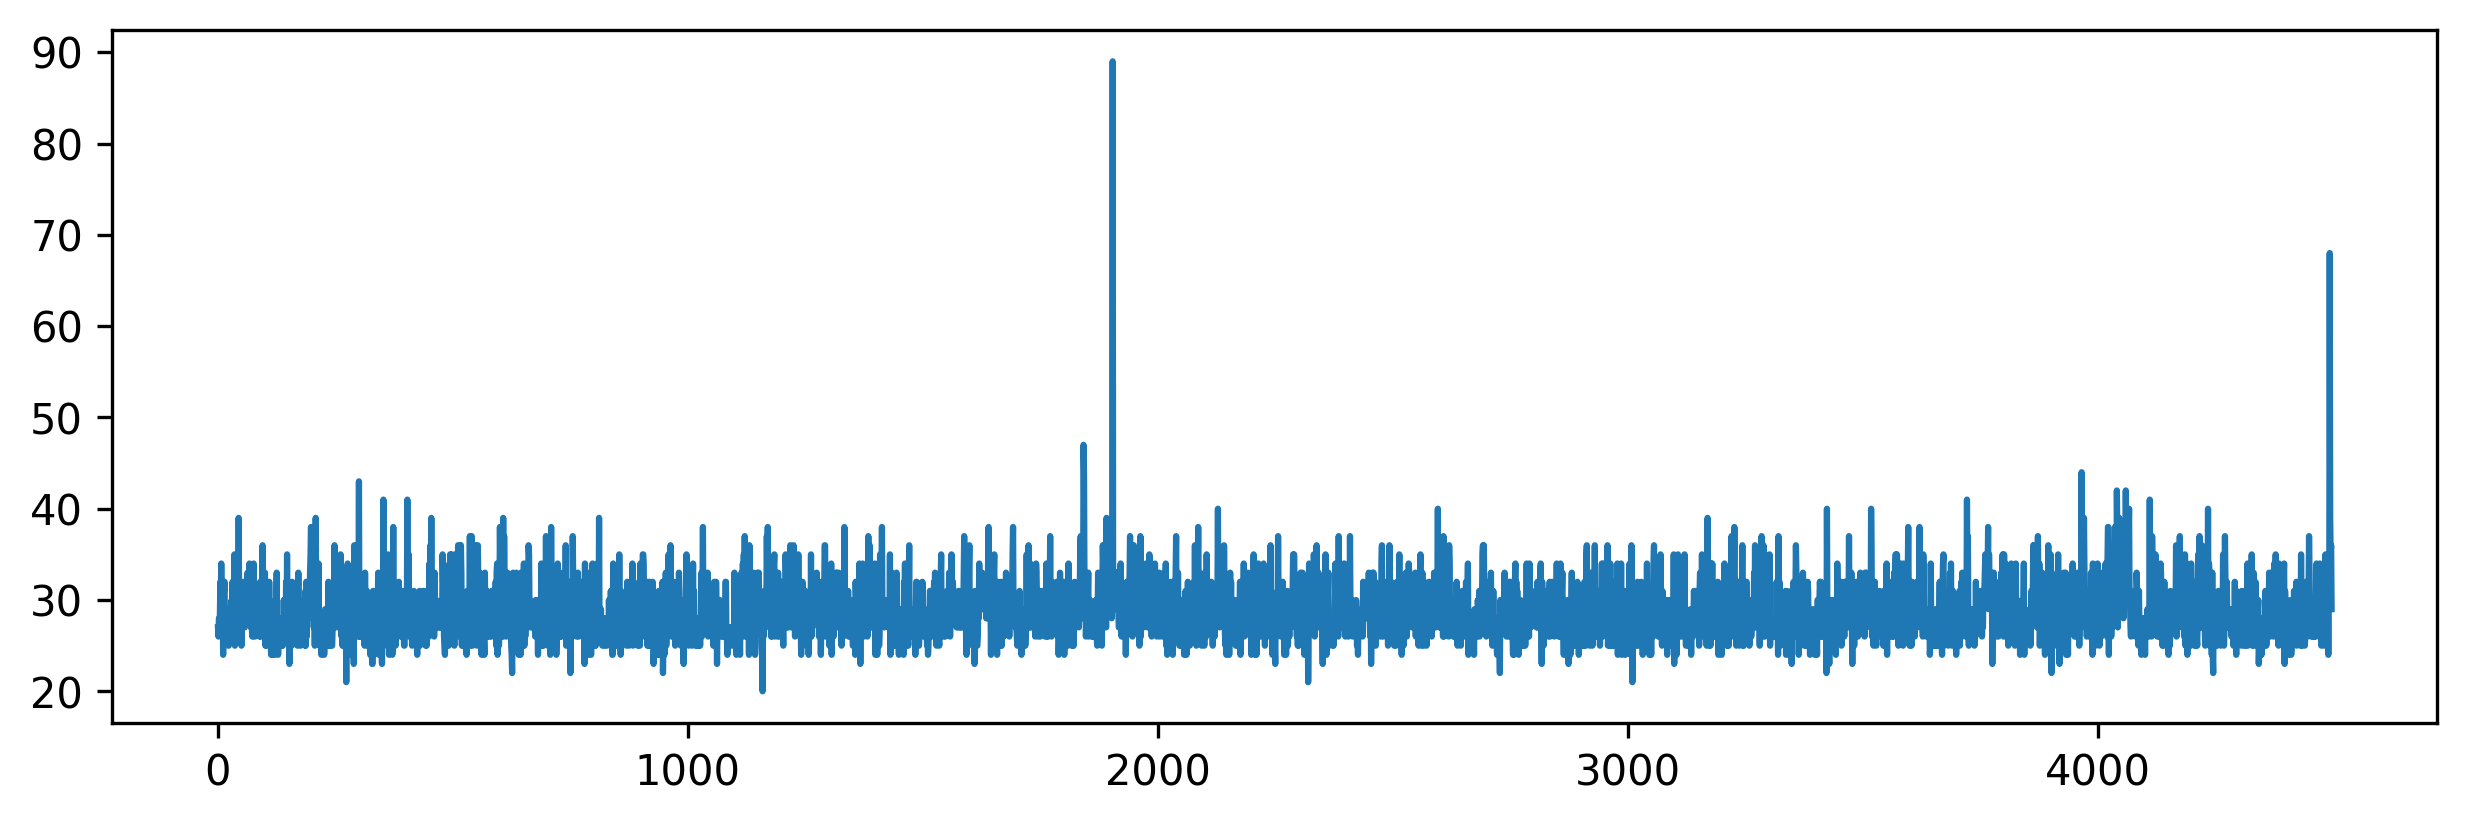

3.2106067064216544


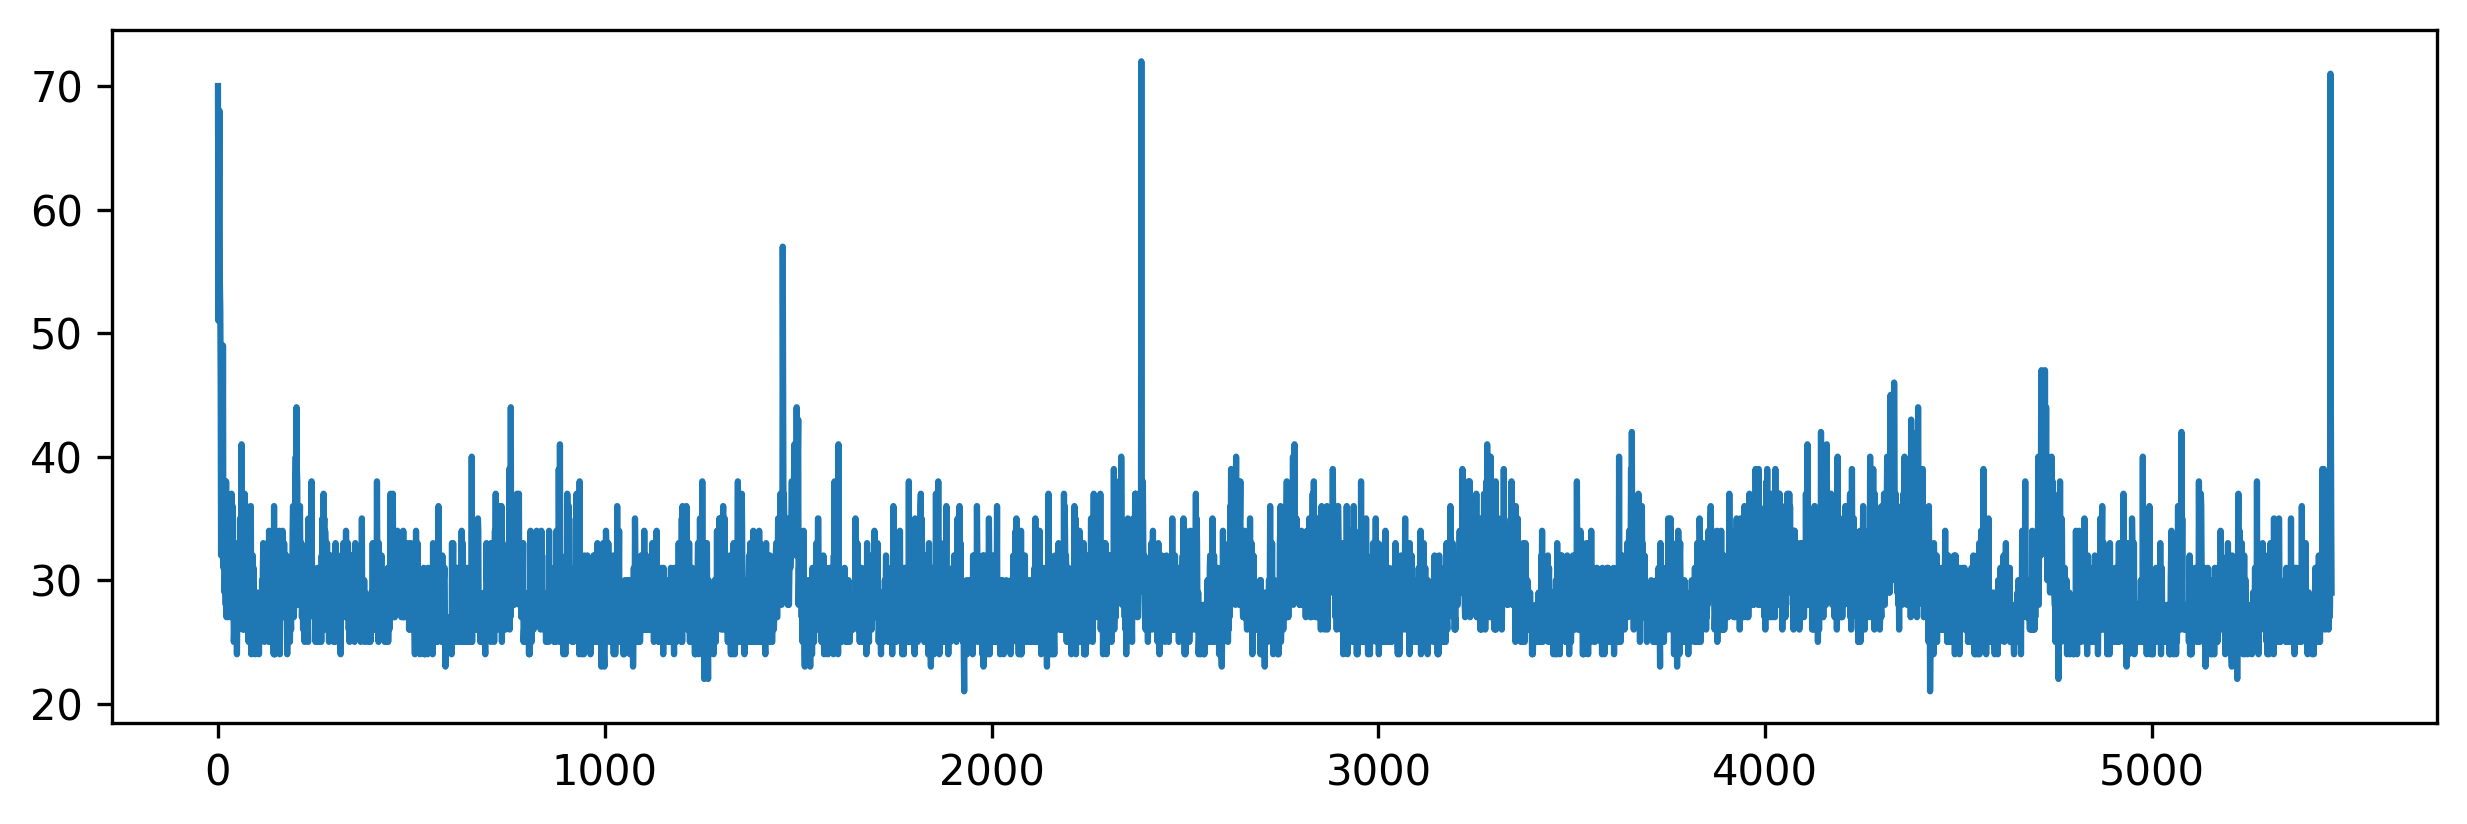

3.696580210407475


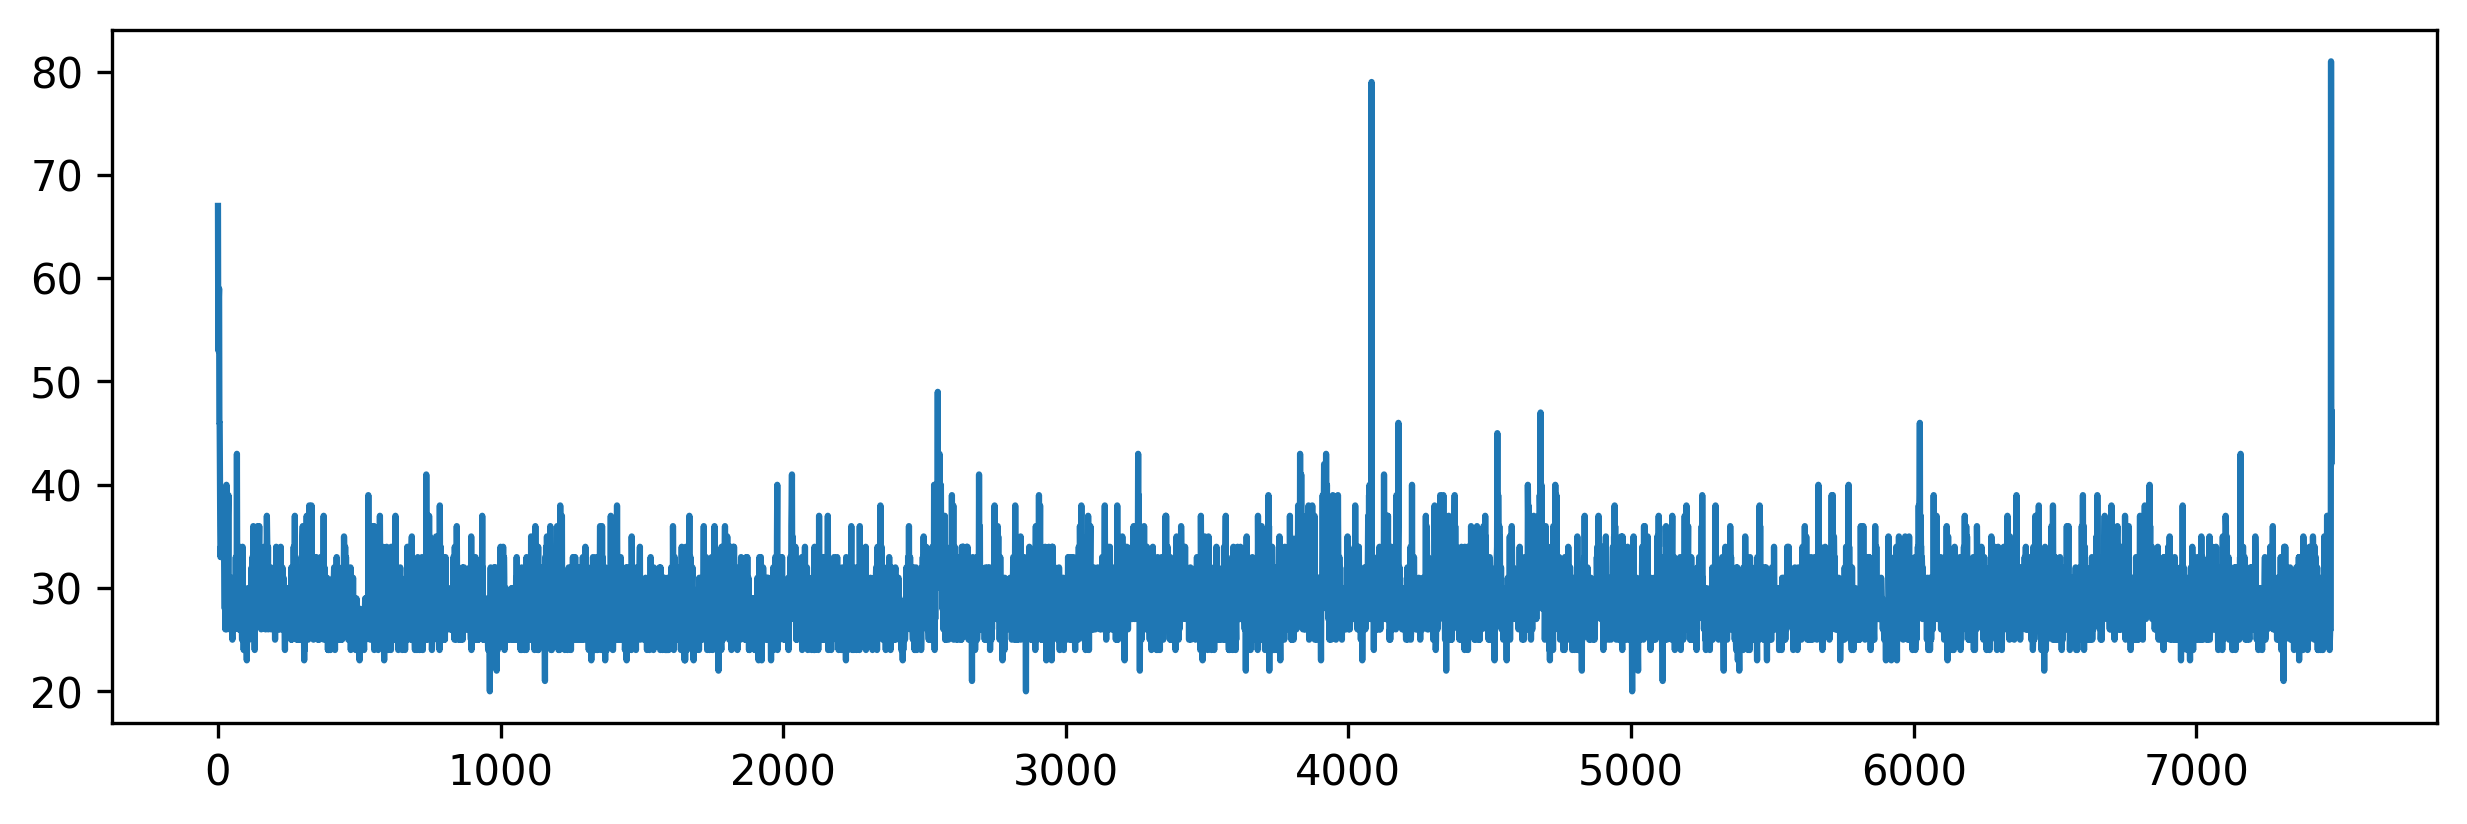

3.3249791168736413


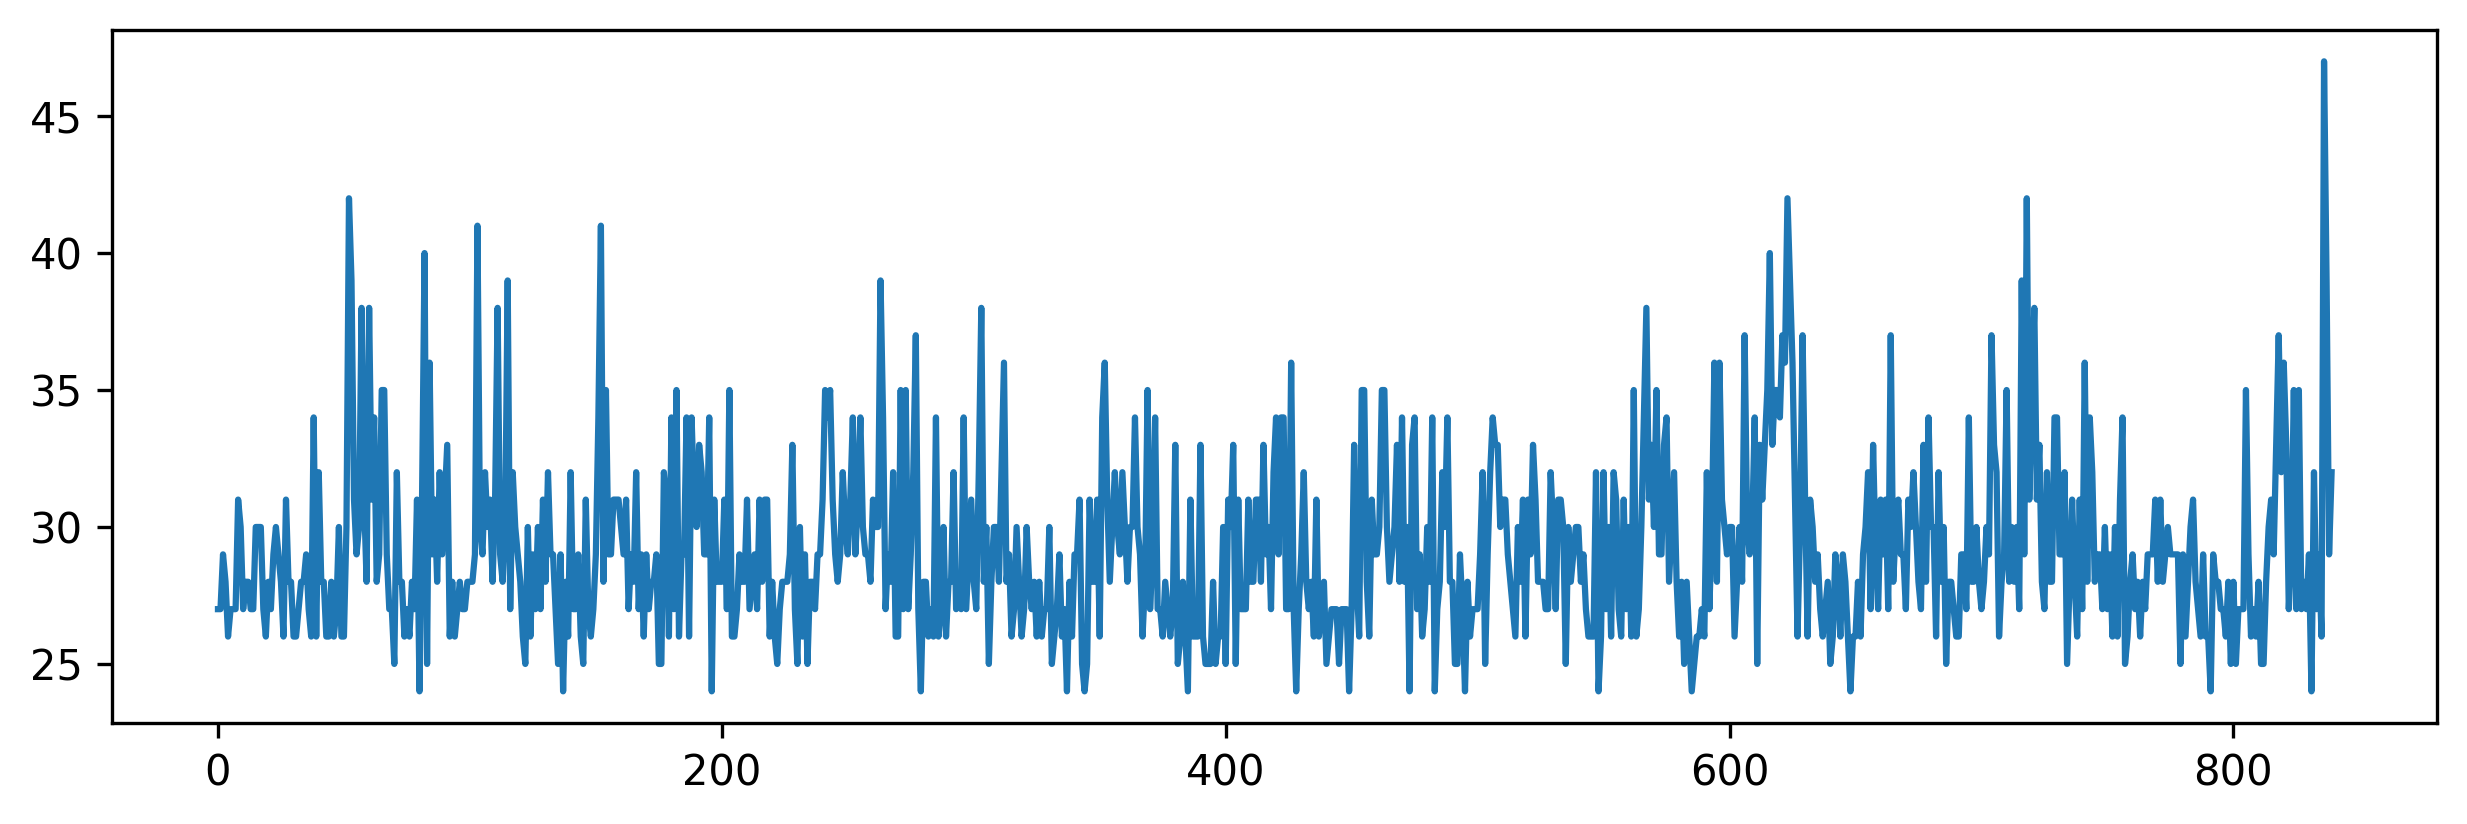

3.2379915194407918


In [24]:
import statistics
import matplotlib.pyplot as plt
for item in timestamp_diff:
    # timeseries = item[["Close"]].values.astype('float32')
    plt.figure(dpi=300,figsize=(10,3))
    # without_abnormal_data = filter_abnormal_data(item[1:])
    plt.plot(item[1:])
    plt.show()
    print(statistics.stdev(item[1:]))

# 有一些很大的异常时间，应该是要插值的
# 有些明显波动很大，说明数据是异常的，应该去掉